# Gradient Descent Algorithm for Simple Linear Regression

In this notebook, we'll implement the gradient descent algorithm for simple linear regression where the y-intercept is assumed to be 0. We'll also visualize the relationship between the error (J) and the slope (m), and experiment with different learning rates.

### Gradient Descent Algorithm

Gradient descent is an optimization algorithm used to minimize the cost function (error) of a machine learning model. In the context of linear regression, the goal is to find the optimal slope (m) that minimizes the error between the predicted and actual values. The update rule for gradient descent is:

$$ m_{new} = m_{old} - \alpha \frac{dJ}{dm} $$

where:
- $m_{new}$ is the new slope
- $m_{old}$ is the old slope
- $\alpha$ is the learning rate
- $J$ is the error (cost) function
- $\frac{dJ}{dm}$ is the derivative of the error function with respect to the slope

### Error Function

The error function measures the difference between the predicted and actual values. In this case, since we assume the y-intercept is 0, the error function simplifies to:

$$ J = \frac{1}{2m} \sum_{i=1}^{m} (y^{(i)} - m * x^{(i)})^2 $$

where:
- $J$ is the error function
- $m$ is the slope
- $x^{(i)}$ is the input feature of the $i^{th}$ training example
- $y^{(i)}$ is the actual output of the $i^{th}$ training example

In [13]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# Define the dataset
X = np.array([3, 5, 2, 7, 4, 6, 1, 3, 5, 4])  # Study hours
y = 1 * X  # Scores

In [17]:
# Error function (Cost function)
def error_function(m, X, y):
    n = len(X)
    total_error = np.sum((y - m * X) ** 2)
    if(m in {-2,-1,0,1,2}):
        print (" slope: %d" +  " error: %d"  ,m,total_error / (2 * n))
    return total_error / (2 * n)

### Visualizing the Error Function

Let's visualize the relationship between the error (J) and the slope (m) to understand how the error changes with different values of the slope.

 slope: %d error: %d -2.0 85.5
 slope: %d error: %d 0.0 9.5
 slope: %d error: %d 2.0 9.5


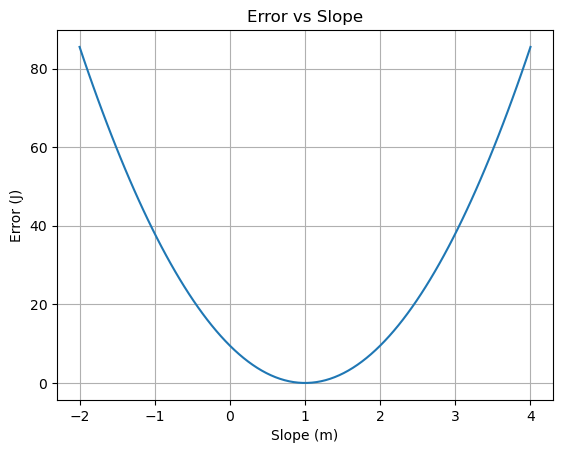

In [19]:
# Calculate error for different values of slope
slope_range = np.linspace(-2, 4, 100)
errors = [error_function(slope, X, y) for slope in slope_range]

# Plotting the error vs slope
plt.plot(slope_range, errors)
plt.title('Error vs Slope')
plt.xlabel('Slope (m)')
plt.ylabel('Error (J)')
plt.grid(True)
plt.show()

In [21]:
# Gradient Descent Algorithm
def gradient_descent(X, y, alpha, epochs):
    m = 0  # Initial slope
    m_values = []  # To store slope values for visualization
    errors = []  # To store error values for visualization
    n = len(X)
    for _ in range(epochs):
        error = error_function(m, X, y)
        errors.append(error)
        m_gradient = np.sum((y - m * X) * X)  # Compute gradient
        m -= alpha * m_gradient / n  # Update slope
        m_values.append(m)
    print(error)
    return m, m_values, errors

 slope: %d error: %d 0 9.5
394.649937680216
 slope: %d error: %d 0 9.5
8630221871877624.0
 slope: %d error: %d 0 9.5
3.40821661489266e+92
 slope: %d error: %d 0 9.5
1.4900636530069884e+203
 slope: %d error: %d 0 9.5
3.816477855115102e+258


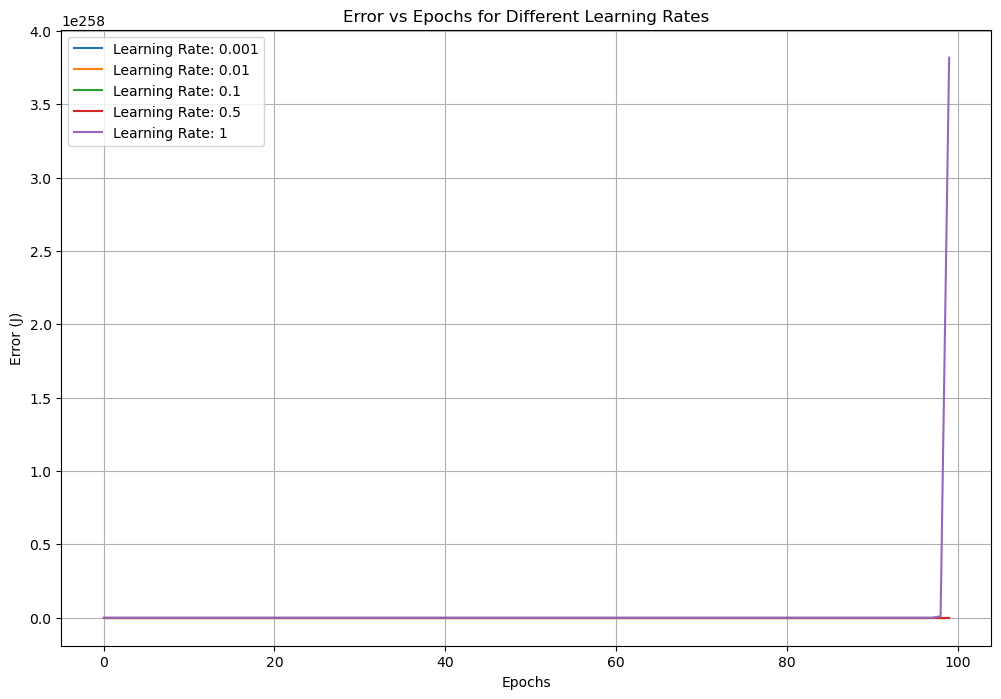

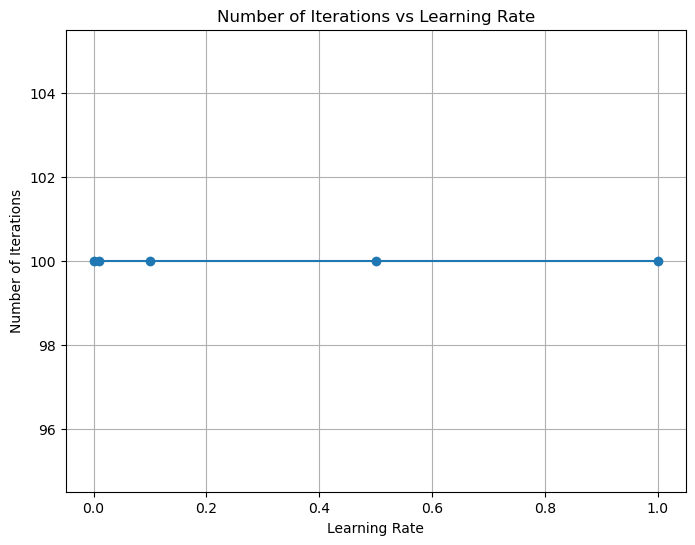

In [23]:
# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5, 1]
epochs = 100
iterations = []


plt.figure(figsize=(12, 8))
for alpha in learning_rates:
    _, _, errors = gradient_descent(X, y, alpha, epochs)
    iterations.append(len(errors))
    plt.plot(range(epochs), errors, label=f'Learning Rate: {alpha}')

plt.title('Error vs Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Error (J)')
plt.legend()
plt.grid(True)
plt.show()

# Displaying the number of iterations vs learning rate
plt.figure(figsize=(8, 6))
plt.plot(learning_rates, iterations, marker='o', linestyle='-')
plt.title('Number of Iterations vs Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Iterations')
plt.grid(True)
plt.show()

In [25]:
# Choosing a learning rate and number of epochs
learning_rate = 0.01
epochs = 5

# Running gradient descent
optimal_slope, _, _ = gradient_descent(X, y, learning_rate, epochs)
print('Optimal Slope (m):', optimal_slope)

 slope: %d error: %d 0 9.5
38.20316079805253
Optimal Slope (m): -1.3863536599000001
